<h1><center> Climated emergencies in Colombia: Spatial Analysis </center></h1>
<h1><left> General Objective </left></h1>

Estimation of a model taking into account risk and changes in temperature and precipitation with an application of spatial regression. The estimate was based on geostatistical studies for rainfall emergencies in Nigeria and on the Institute of Development Studies' compilation work for the UK government on predictive models in humanitarian actions.

Importing packaged and data collected for the 32 deparments of Colombia. The data includes people benefited, resources invested, risk climate index, average temperature and precipitation.

In [191]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel
import pandas as pd

data2= pd.read_excel('Emer.xlsx', sheet_name="Python")
import numpy as np

y_transformed = np.sqrt(data2['money_real'])
# Update the data frame with the transformed variable
data2['money_spent_transformed'] = y_transformed
data2['cost']= data2['money_real']/data2['people_benefited']
data2['cost']= data2['cost'].fillna(0)
data2['cost_transformed']= np.sqrt(data2['cost'])
data2

,Departamento,year,people_benefited,money_spent,money_real,risk_index,Temperature,Average temperature,Diff_Temp,Porc_Temp,Precipitacion,Diff_Prec,Porc_Prec,money_spent_transformed,cost,cost_transformed
0,LA GUAJIRA,2018,0,0,0.000000e+00,0.172300,28.357762,27.431986,-0.097618,-0.003431,3321.182,1090.182,0.488652,0.000000,0.000000e+00,0.000000
1,LA GUAJIRA,2019,0,0,0.000000e+00,0.172300,28.262284,27.431986,-0.095478,-0.003367,4831.730,1510.548,0.454822,0.000000,0.000000e+00,0.000000
2,LA GUAJIRA,2020,20840,1999998165,1.896092e+09,0.172300,28.036185,27.431986,-0.226099,-0.008000,15337.330,10505.600,2.174294,43544.142047,9.098332e+04,301.634408
3,LA GUAJIRA,2021,0,0,0.000000e+00,0.172300,27.743699,27.431986,-0.292486,-0.010432,1775.650,-13561.680,-0.884227,0.000000,0.000000e+00,0.000000
4,LA GUAJIRA,2022,43360,1833361400,1.454702e+09,0.172300,27.457368,27.431986,-0.286331,-0.010321,5926.980,4151.330,2.337921,38140.560725,3.354941e+04,183.164977
5,META,2018,0,852924461,8.529245e+08,0.161800,25.660393,22.923474,0.820243,0.033021,18604.300,8533.300,0.847314,29204.870501,inf,inf
6,META,2019,0,885639852,8.532176e+08,0.161800,24.600299,22.923474,-1.060094,-0.041312,27613.970,9009.670,0.484279,29209.888459,inf,inf
7,META,2020,0,906874892,8.597600e+08,0.161800,24.545394,22.923474,-0.054904,-0.002232,13537.320,-14076.650,-0.509766,29321.665057,inf,inf
8,META,2021,0,1047808050,9.404973e+08,0.161800,23.300276,22.923474,-1.245119,-0.050727,16251.440,2714.120,0.200492,30667.528548,inf,inf
9,META,2022,10833,2867232951,2.275040e+09,0.161800,22.960214,22.923474,-0.340062,-0.014595,14289.020,-1962.420,-0.120754,47697.379707,2.100102e+05,458.268652


Extract the information about polygons of each department in order to analyze relationships for each deparment with its neighbors.

In [192]:
import geopandas as gpd
df= data2
df['Departamento'] = df['Departamento'].replace({'ARAUCA': 'Arauca', 'BOLÍVAR': 'Bolívar', 'LA GUAJIRA':'La Guajira',
                                                 'META':'Meta','NORTE DE SANTANDER':'Norte de Santander',
                                                 'SANTANDER':'Santander'})
shapefile_path = 'inputLayers.shp'
gdf = gpd.read_file(shapefile_path)
# Get unique values in Departamento column
deptos = df['Departamento'].unique()

# Filter gdf based on unique values
gdf_filtered = gdf[gdf['NOMBREDEPT'].isin(deptos)]
# Perform left join between df and gdf
df = gdf[['FID_', 'geometry', 'NOMBREDEPT']].merge(df, left_on='NOMBREDEPT', right_on='Departamento', how='right')
df3 = df.drop('FID_', axis=1)
df3['FID_'] = df3.index
df3 = df3.drop(['money_spent','Departamento','people_benefited','money_real','Temperature','Average temperature',
               'Diff_Temp','Precipitacion','Diff_Prec','cost','cost_transformed'], axis=1)
df3

,geometry,NOMBREDEPT,year,risk_index,Porc_Temp,Porc_Prec,money_spent_transformed,FID_
0,"POLYGON ((-8194770.000 1212737.000, -8194878.0...",La Guajira,2018,0.172300,-0.003431,0.488652,0.000000,0
1,"POLYGON ((-8194770.000 1212737.000, -8194878.0...",La Guajira,2019,0.172300,-0.003367,0.454822,0.000000,1
2,"POLYGON ((-8194770.000 1212737.000, -8194878.0...",La Guajira,2020,0.172300,-0.008000,2.174294,43544.142047,2
3,"POLYGON ((-8194770.000 1212737.000, -8194878.0...",La Guajira,2021,0.172300,-0.010432,-0.884227,0.000000,3
4,"POLYGON ((-8194770.000 1212737.000, -8194878.0...",La Guajira,2022,0.172300,-0.010321,2.337921,38140.560725,4
5,"POLYGON ((-7913794.000 320356.000, -7914044.00...",Meta,2018,0.161800,0.033021,0.847314,29204.870501,5
6,"POLYGON ((-7913794.000 320356.000, -7914044.00...",Meta,2019,0.161800,-0.041312,0.484279,29209.888459,6
7,"POLYGON ((-7913794.000 320356.000, -7914044.00...",Meta,2020,0.161800,-0.002232,-0.509766,29321.665057,7
8,"POLYGON ((-7913794.000 320356.000, -7914044.00...",Meta,2021,0.161800,-0.050727,0.200492,30667.528548,8
9,"POLYGON ((-7913794.000 320356.000, -7914044.00...",Meta,2022,0.161800,-0.014595,-0.120754,47697.379707,9


Use K-nearest neighbors algorithm to create a matrix with binary values if a deparment shares a frontier with another deparment.

In [193]:
import libpysal
w = libpysal.weights.KNN.from_dataframe(df3)
import numpy as np
from scipy.sparse import dok_matrix

# Convert the weights object to a matrix
w_matrix = dok_matrix((len(w.id_order), len(w.id_order)), dtype=float)
for i in range(len(w.id_order)):
    neighbors, weights = w.neighbors[i], w.weights[i]
    for neighbor, weight in zip(neighbors, weights):
        w_matrix[i, neighbor] = weight

# Convert the matrix to a DataFrame
w_df = pd.DataFrame(np.array(w_matrix.todense()), index=w.id_order, columns=w.id_order)
w_df

C:\Users\krist\anaconda3\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 9 disconnected components.
  warnings.warn(message)


,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [194]:
import numpy as np
import pandas as pd
from statsmodels.api import OLS
from spreg import GM_Lag, GM_Error_Het, ML_Lag, ML_Error

data=df3
# convert data to numpy arrays
y = data["money_spent_transformed"].values
x = data[['risk_index', 'Porc_Temp', 'Porc_Prec']].values
w = libpysal.weights.KNN.from_dataframe(data,  k=3)

C:\Users\krist\anaconda3\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 9 disconnected components.
  warnings.warn(message)


<h1><left> Spatial regression </left></h1>

In [150]:
import numpy as np
import pandas as pd
import libpysal
from esda.moran import Moran
from esda.smaup import Smaup
from statsmodels.api import OLS
from scipy import stats
from spreg import GM_Lag, GM_Error_Het, ML_Lag, ML_Error

# Compute the residuals from the spatial regression model
residuals = model_s2lq.u

# Compute the spatial weights matrix
w = libpysal.weights.KNN.from_dataframe(data,  k=3)
w.transform = 'r'

# Compute Moran's I statistic
moran = Moran(residuals, w)
print("Moran's I: {:.4f}".format(moran.I))
print("p-value: {:.4f}".format(moran.p_sim))

from statsmodels.stats.diagnostic import het_breuschpagan

# Compute the residuals and predicted values from the spatial regression model
residuals = model_s2lq.u
predicted_values = model_s2lq.predy

# Compute the squared residuals and the product of the squared residuals and the predicted values
squared_residuals = residuals**2
product = squared_residuals * predicted_values

# Regress the squared residuals and the product on the original predictors
_, p1, _, _ = het_breuschpagan(squared_residuals, x)
_, p2, _, _ = het_breuschpagan(product, x)

# Compute the Breusch-Pagan statistic and p-value
bp_statistic = p1 + p2
bp_pvalue = stats.chi2.sf(bp_statistic, x.shape[1])
print("Breusch-Pagan statistic: {:.4f}".format(bp_statistic))
print("p-value: {:.4f}".format(bp_pvalue))


NameError: name 'model_s2lq' is not defined

<h1><left> Prediction </left></h1>

In [195]:
# Prepare new data
new_data = pd.DataFrame({
    'Constant': [1,1,1,1,1,1],
    'risk_index': [0.1618, 0.1867, 0.1566, 0.737, 0.544, 0.451 ],
    'Porc_Temp': [0.0016, 0.14, 0.1531, 0.2, 0.05, 0.05],
    'Porc_Prec': [-0.26, -0.28, -0.15, -0.15, -0.001, -0.001],
'Departamento': ['Meta', 'Bolívar', 'Santander', 'SAN ANDRÉS PROVIDENCIA', 'Vaupés', 'Amazonas']})


# Get unique values in Departamento column
deptos = new_data['Departamento'].unique()

# Filter gdf based on unique values
gdf_filtered = gdf[gdf['NOMBREDEPT'].isin(deptos)]
# Perform left join between df and gdf
new_data = gdf[['FID_', 'geometry', 'NOMBREDEPT']].merge(new_data, left_on='NOMBREDEPT', right_on='Departamento', how='right')
new_data = new_data.drop('FID_', axis=1)
new_data['FID_'] = new_data.index
new_data

# Load weights matrix
w_new = libpysal.weights.KNN.from_dataframe(new_data, ids='FID_', k=3)
w_new.transform = 'r'

x_new = new_data[['Constant','risk_index', 'Porc_Temp', 'Porc_Prec']].values
from spreg.utils import inverse_prod
from spreg.sputils import spdot
import locale

# set the locale to your preferred format
locale.setlocale(locale.LC_ALL, 'en_US')

# obtain predicted values for the original data
y_pred = model_s2lq.predy
# Load weights matrix
w_new = libpysal.weights.KNN.from_dataframe(new_data, ids='FID_', k=3)
w_new.transform = 'r'


b = model_s2lq.betas
xb= spdot(x_new,b[:-1])
y_pred_new= inverse_prod(w_new.sparse, xb, model_s2lq.rho, inv_method= 'power_exp')
# apply inverse transformation
y_pred_new = np.square(y_pred_new)

# original predicted values
y_pred_dollars = np.array(y_pred_new)

# convert to dollars with two decimal places and thousands separators
# convert to dollars with two decimal places and thousands separators
y_pred_dollars_str = []
for value in y_pred_dollars:
    formatted_value = '{:,.2f}'.format(float(value))
    y_pred_dollars_str.append(f'${formatted_value}')

print(y_pred_dollars_str)


NameError: name 'model_s2lq' is not defined

In [196]:
from pysal.model.spreg import ML_Lag
from pysal.model.spreg import diagnostics as diag
from pysal.model import spreg
from esda.geary import Geary

# calculate Moran's I
moran = Moran(y, w)

# test for spatial autocorrelation
print("Moran's I: ", moran.I)
print("p-value: ", moran.p_sim)
geary = Geary(y, w)
print("Geary's I: ", geary.C)
print("p-value: ", geary.p_sim)

Moran's I:  0.270223740275691
p-value:  0.016
Geary's I:  0.738669314334174
p-value:  0.019


<h1><left> Graphics and statistics </left></h1>

C:\Users\krist\AppData\Roaming\Python\Python310\site-packages\splot\_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


(<Figure size 1000x400 with 2 Axes>,
 array([<Axes: title={'center': 'Reference Distribution'}, xlabel='Moran I: 0.27', ylabel='Density'>,
        <Axes: title={'center': 'Moran Scatterplot (0.27)'}, xlabel='Attribute', ylabel='Spatial Lag'>],
       dtype=object))

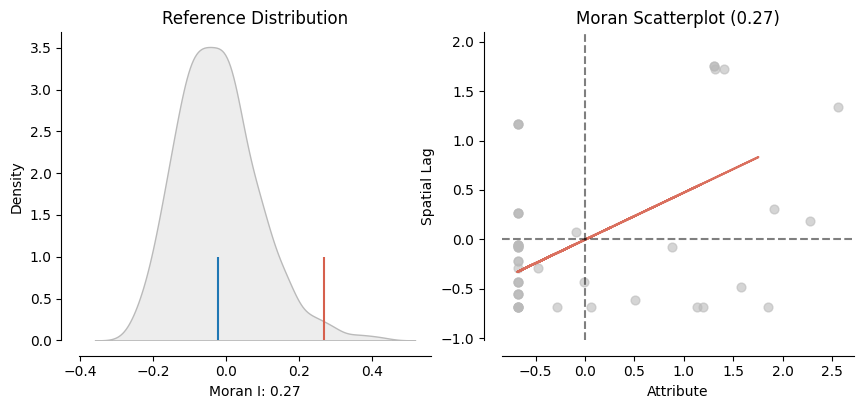

In [197]:
import matplotlib.pyplot as plt
from libpysal.weights.contiguity import Queen
from libpysal import examples
import geopandas as gpd
from esda.moran import Moran
from splot.esda import plot_moran
plot_moran(moran)

In [198]:
from esda.moran import Moran_Local
lisa = Moran_Local(y, w)

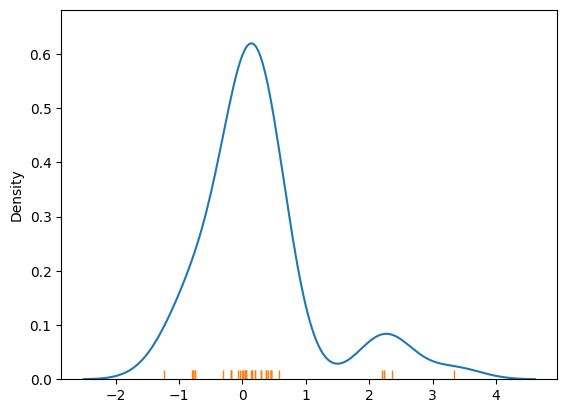

In [199]:
import seaborn  # Graphics
# Draw KDE line
ax = seaborn.kdeplot(lisa.Is)
# Add one small bar (rug) for each observation
# along horizontal axis
seaborn.rugplot(lisa.Is, ax=ax);

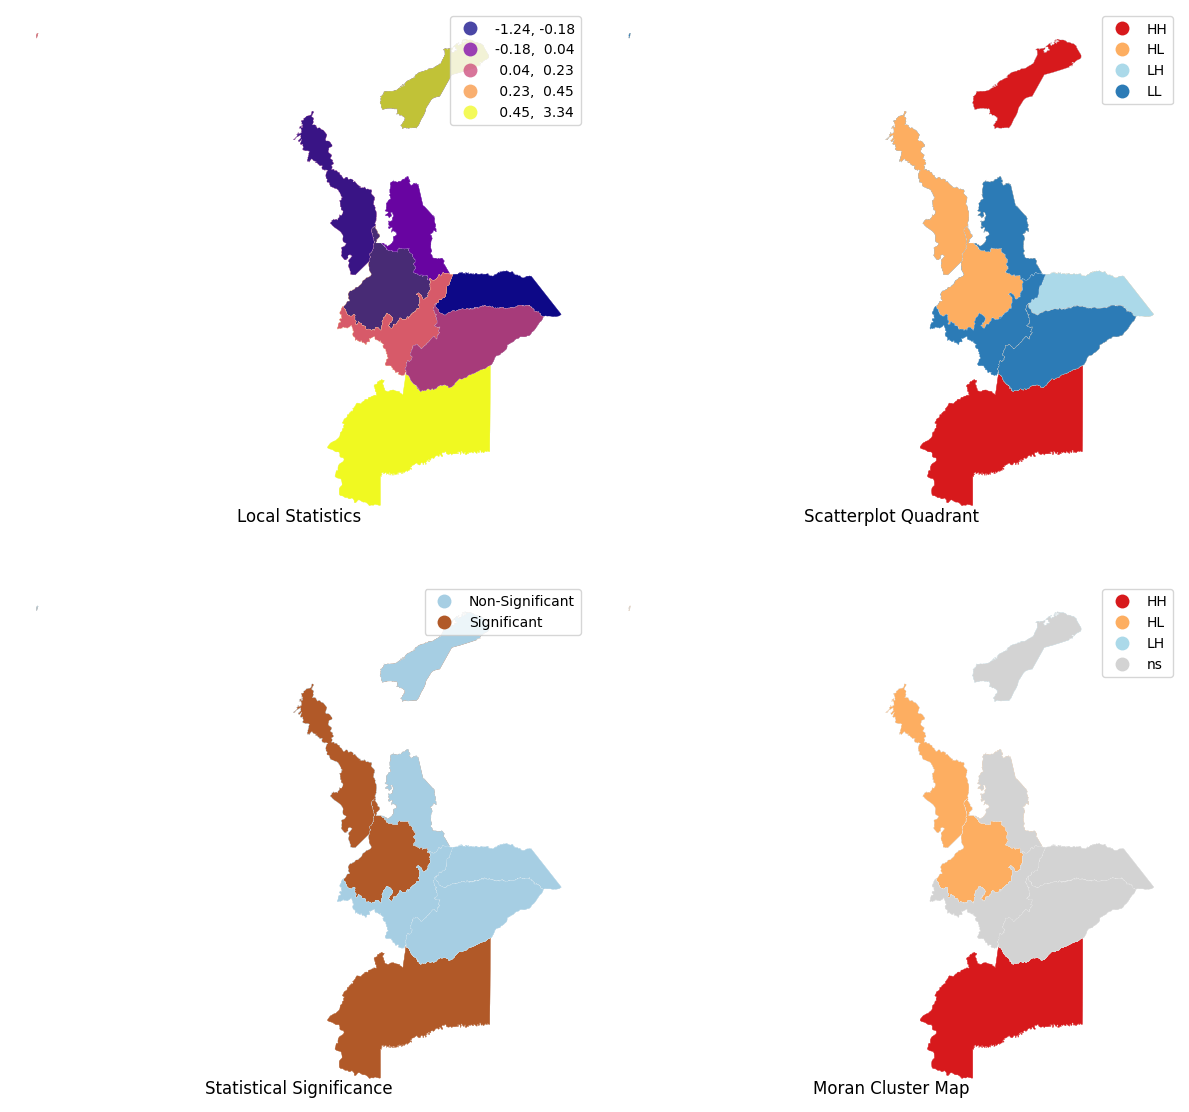

In [200]:
import matplotlib.pyplot as plt
from splot.esda import lisa_cluster
# Set up figure and axes
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()

# Subplot 1 #
# Choropleth of local statistics
# Grab first axis in the figure
ax = axs[0]
# Assign new column with local statistics on-the-fly
df3.assign(
    Is=lisa.Is
    # Plot choropleth of local statistics
).plot(
    column="Is",
    cmap="plasma",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.1,
    alpha=0.75,
    legend=True,
    ax=ax,
)

# Subplot 2 #
# Quadrant categories
# Grab second axis of local statistics
ax = axs[1]
# Plot Quadrant colors (note to ensure all polygons are assigned a
# quadrant, we "trick" the function by setting significance level to
# 1 so all observations are treated as "significant" and thus assigned
# a quadrant color
lisa_cluster(lisa, df3, p=1, ax=ax)

# Subplot 3 #
# Significance map
# Grab third axis of local statistics
ax = axs[2]
#
# Find out significant observations
labels = pd.Series(
    1 * (lisa.p_sim < 0.05),  # Assign 1 if significant, 0 otherwise
    index=df3.index  # Use the index in the original data
    # Recode 1 to "Significant and 0 to "Non-significant"
).map({1: "Significant", 0: "Non-Significant"})
# Assign labels to `db` on the fly
df3.assign(
    cl=labels
    # Plot choropleth of (non-)significant areas
).plot(
    column="cl",
    categorical=True,
    k=2,
    cmap="Paired",
    linewidth=0.1,
    edgecolor="white",
    legend=True,
    ax=ax,
)


# Subplot 4 #
# Cluster map
# Grab second axis of local statistics
ax = axs[3]
# Plot Quadrant colors In this case, we use a 5% significance
# level to select polygons as part of statistically significant
# clusters
lisa_cluster(lisa, df3, p=0.05, ax=ax)

# Figure styling #
# Set title to each subplot
for i, ax in enumerate(axs.flatten()):
    ax.set_axis_off()
    ax.set_title(
        [
            "Local Statistics",
            "Scatterplot Quadrant",
            "Statistical Significance",
            "Moran Cluster Map",
        ][i],
        y=0,
    )
# Tight layout to minimize in-between white space
f.tight_layout()

# Display the figure
plt.show()

In [265]:
import numpy as np
import pandas as pd
import libpysal
from esda.moran import Moran
from esda.smaup import Smaup
from statsmodels.api import OLS
from scipy import stats
from libpysal.weights import W
data= df3
# calculate spatial lags of variables
# convert data to numpy arrays
w = libpysal.weights.KNN.from_dataframe(data,  k=1)
y_lag = pd.Series(libpysal.weights.lag_spatial(w, df3['money_spent_transformed']), name='y_lag')
x1_lag = pd.Series(libpysal.weights.lag_spatial(w, df3['risk_index']), name='x1_lag')
x2_lag = pd.Series(libpysal.weights.lag_spatial(w, df3['Porc_Temp']), name='x2_lag')
x3_lag = pd.Series(libpysal.weights.lag_spatial(w, df3['Porc_Prec']), name='x3_lag')

C:\Users\krist\anaconda3\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 9 disconnected components.
  warnings.warn(message)


In [266]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

# combine original and lag variables
X_new = pd.concat([data[['year']], y_lag, x1_lag, x2_lag, x3_lag], axis=1)
# Split data into training and testing sets
train_data = X_new[X_new['year'] >= 2020]
test_data = X_new[X_new['year'] < 2020]
w = libpysal.weights.KNN.from_dataframe(data,  k=1)
# Define the dependent and independent variables
X= X_new[['x1_lag', 'x2_lag', 'x3_lag']]
y= X_new[['y_lag']]
y_train = train_data['y_lag']
X_train = train_data[['x1_lag', 'x2_lag', 'x3_lag']]
y_test = test_data['y_lag']
X_test = test_data[['x1_lag', 'x2_lag', 'x3_lag']]


# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regression": SVR(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor()
}

# Evaluate models with cross-validation
for name, model in models.items():
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"{name}: RMSE = {rmse_scores.mean():.2f} +/- {rmse_scores.std():.2f}")
    r2_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')
    print(f"{name}: R^2 = {r2_scores.mean():.2f} +/- {r2_scores.std():.2f}")

C:\Users\krist\anaconda3\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 9 disconnected components.
  warnings.warn(message)
C:\Users\krist\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Linear Regression: RMSE = 17648.42 +/- 1196.79
Linear Regression: R^2 = -0.20 +/- 0.24


C:\Users\krist\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\krist\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\krist\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\krist\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

Random Forest: RMSE = 8263.53 +/- 6906.59


C:\Users\krist\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\krist\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\krist\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\krist\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

Random Forest: R^2 = 0.50 +/- 0.72
Support Vector Regression: RMSE = 20334.07 +/- 3601.62
Support Vector Regression: R^2 = -0.57 +/- 0.40
XGBoost: RMSE = 8079.73 +/- 8190.66
XGBoost: R^2 = 0.43 +/- 0.84
LightGBM: RMSE = 17417.54 +/- 1191.51
LightGBM: R^2 = -0.15 +/- 0.10


In [267]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
for name, model in models.items():
    # fit the model on the training set
    model.fit(X_train, y_train)
    # evaluate the model on the test set
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name} - MAE on test set: {mae:.2f}")
    mse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name} - MSE on test set: {mse:.2f}")
    # calculate R2 score
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - R2 on test set: {r2:.2f}")
    ev = explained_variance_score(y_test, y_pred)
    print(f"{name} - Explained Variance Score: {ev:.2f}")
mean_y_test = np.mean(y_test)
print(f"Mean value of dependent variable on test set: {mean_y_test:.2f}")

Linear Regression - MAE on test set: 14934.06
Linear Regression - MSE on test set: 18036.51
Linear Regression - R2 on test set: -0.02
Linear Regression - Explained Variance Score: -0.01
Random Forest - MAE on test set: 5188.06
Random Forest - MSE on test set: 10201.33
Random Forest - R2 on test set: 0.67
Random Forest - Explained Variance Score: 0.70
Support Vector Regression - MAE on test set: 13715.76
Support Vector Regression - MSE on test set: 22515.05
Support Vector Regression - R2 on test set: -0.59
Support Vector Regression - Explained Variance Score: 0.00
XGBoost - MAE on test set: 1895.21
XGBoost - MSE on test set: 8040.66
XGBoost - R2 on test set: 0.80
XGBoost - Explained Variance Score: 0.81
LightGBM - MAE on test set: 14858.26
LightGBM - MSE on test set: 18183.90
LightGBM - R2 on test set: -0.04
LightGBM - Explained Variance Score: 0.00
Mean value of dependent variable on test set: 13716.05


In [273]:
# Initialize models
rf = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=42)
xgb = XGBRegressor(n_estimators=50, max_depth=5, random_state=42)

In [274]:
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [275]:
    y_pred = rf.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"rf - MAE on test set: {mae:.2f}")
    mse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"rf - MSE on test set: {mse:.2f}")
    # calculate R2 score
    r2 = r2_score(y_test, y_pred)
    print(f"rf - R2 on test set: {r2:.2f}")
    ev = explained_variance_score(y_test, y_pred)
    print(f"rf - Explained Variance Score: {ev:.2f}")

rf - MAE on test set: 4806.05
rf - MSE on test set: 9811.81
rf - R2 on test set: 0.70
rf - Explained Variance Score: 0.72


In [276]:
    y_pred = xgb.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"xgb - MAE on test set: {mae:.2f}")
    mse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"xgb - MSE on test set: {mse:.2f}")
    # calculate R2 score
    r2 = r2_score(y_test, y_pred)
    print(f"xgb - R2 on test set: {r2:.2f}")
    ev = explained_variance_score(y_test, y_pred)
    print(f"xgb - Explained Variance Score: {ev:.2f}")

xgb - MAE on test set: 1895.28
xgb - MSE on test set: 8040.47
xgb - R2 on test set: 0.80
xgb - Explained Variance Score: 0.81


In [272]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for random forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'random_state': [42]
}

# Define parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'random_state': [42]
}

# Perform grid search for random forest
rf_grid = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train)

# Perform grid search for XGBoost
xgb_grid = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid, cv=5, scoring='neg_mean_squared_error')
xgb_grid.fit(X_train, y_train)

# Print the best hyperparameters for each model
print(f"Random Forest: {rf_grid.best_params_}")
print(f"XGBoost: {xgb_grid.best_params_}")

Random Forest: {'max_depth': 10, 'n_estimators': 100, 'random_state': 42}
XGBoost: {'max_depth': 5, 'n_estimators': 50, 'random_state': 42}


In [277]:
# Make predictions on new data
# Prepare new data
new_data = pd.DataFrame({
    'Constant': [1,1,1,1,1,1,1,1,1,1],
    'risk_index': [0.1618, 0.1867, 0.1566, 0.172300,0.150465, 0.737, 0.544, 0.451, 0.39,0.265],
    'Porc_Temp': [0.016, 0.014, 0.015,0.1,0.016, 0.1, 0.05, 0.05, 0.05,0.02],
    'Porc_Prec': [-0.16, -0.18, -0.15,-0.15, -0.16,-0.2, -0.01, -0.01, -0.01, -0.15],
'Departamento': ['Meta', 'Bolívar', 'Santander','La Guajira','Casanare','SAN ANDRÉS PROVIDENCIA', 'Vaupés', 'Amazonas', 'Guainía','Chocó']})


# Get unique values in Departamento column
deptos = new_data['Departamento'].unique()

# Filter gdf based on unique values
gdf_filtered = gdf[gdf['NOMBREDEPT'].isin(deptos)]
# Perform left join between df and gdf
new_data = gdf[['FID_', 'geometry', 'NOMBREDEPT']].merge(new_data, left_on='NOMBREDEPT', right_on='Departamento', how='right')
new_data = new_data.drop('FID_', axis=1)
new_data['FID_'] = new_data.index
new_data

# calculate spatial lags of variables
# convert data to numpy arrays
w = libpysal.weights.KNN.from_dataframe(data,  k=3)
x1_lag= pd.Series(libpysal.weights.lag_spatial(w_new, new_data['risk_index']), name='x1_lag')
x2_lag = pd.Series(libpysal.weights.lag_spatial(w_new, new_data['Porc_Temp']), name='x2_lag')
x3_lag = pd.Series(libpysal.weights.lag_spatial(w_new, new_data['Porc_Prec']), name='x3_lag')
X_new = pd.concat([x1_lag, x2_lag, x3_lag], axis=1)
y_pred_rf = rf.predict(X_new)
y_pred_xgb= xgb.predict(X_new)

# Print the predicted values
print(np.square(y_pred_rf))
print(np.square(y_pred_xgb))

mean_y_pred_rf = np.mean(y_pred_rf)
mean_y_pred_xgb=np.mean(y_pred_xgb)
import locale

# set the locale to use US dollars format
locale.setlocale(locale.LC_ALL, 'en_US')
# format the mean prediction value as US dollars
mean_y_pred_formattedrf = locale.currency(np.square(mean_y_pred_rf), grouping=True)
mean_y_pred_formattedxgb =locale.currency(np.square(mean_y_pred_xgb), grouping=True)
print("Mean prediction value rf:", mean_y_pred_formattedrf)
print("Mean prediction value xgb:", mean_y_pred_formattedxgb)                                           
# Print the predicted values in money format
for pred in y_pred_rf:
    print('${:,.2f}'.format(np.square(pred)))
for pred in y_pred_xgb:
    print('${:,.2f}'.format(np.square(pred)))

[27089219.06102157 27089219.06102157 89177970.31522538 89177970.31522538
 27089219.06102157 27089219.06102157 27089219.06102157 27089219.06102157
 27089219.06102157 89177970.31522538]
[1.18118904e+08 1.18118904e+08 1.18118904e+08 1.18118904e+08
 1.18118904e+08 1.18118904e+08 1.18118904e+08 1.18118904e+08
 1.18118904e+08 1.18118904e+08]
Mean prediction value rf: $41,942,901.61
Mean prediction value xgb: $118,118,904.00
$27,089,219.06
$27,089,219.06
$89,177,970.32
$89,177,970.32
$27,089,219.06
$27,089,219.06
$27,089,219.06
$27,089,219.06
$27,089,219.06
$89,177,970.32
$118,118,904.00
$118,118,904.00
$118,118,904.00
$118,118,904.00
$118,118,904.00
$118,118,904.00
$118,118,904.00
$118,118,904.00
$118,118,904.00
$118,118,904.00


C:\Users\krist\anaconda3\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 9 disconnected components.
  warnings.warn(message)


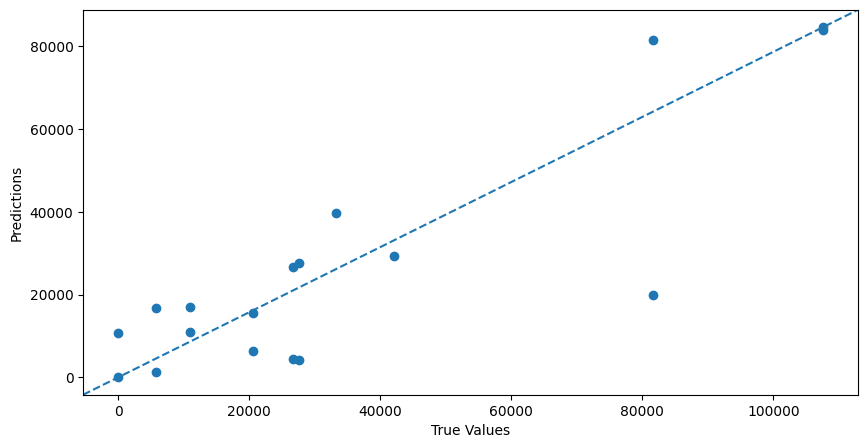

In [226]:
import numpy as np
import matplotlib.pyplot as plt


# get predicted values and standard deviations
preds = xgb.predict(X_test)
stds = np.std([xgb.predict(X_test) for i in range(1000)], axis=0)

# plot the results with 95% confidence intervals
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(y_test, preds)
ax.errorbar(y_test, preds, yerr=1.96*stds, fmt='none', alpha=0.5)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle='--')
ax.set_xlabel('True Values')
ax.set_ylabel('Predictions')
plt.show()


In [145]:
y_pred = xgb.predict(X)
y_pred=pd.Series(xgb.predict(X), name='y_pred')
residuals = y - y_pred
lisa = Moran_Local(residuals, w)

In [146]:
data.assign(
    Is=lisa.Is)

,geometry,NOMBREDEPT,Departamento,year,people_benefited,money_spent,money_real,risk_index,Temperature,Average temperature,Diff_Temp,Porc_Temp,Precipitacion,Diff_Prec,Porc_Prec,money_spent_transformed,cost,cost_transformed,FID_,Is
0,"POLYGON ((-8194770.000 1212737.000, -8194878.0...",La Guajira,La Guajira,2018,0,0,0.000000e+00,0.172300,28.357762,27.431986,-0.097618,-0.003431,3321.182,1090.182,0.488652,0.000000,0.000000e+00,0.000000,0,0.018757
1,"POLYGON ((-8194770.000 1212737.000, -8194878.0...",La Guajira,La Guajira,2019,0,0,0.000000e+00,0.172300,28.262284,27.431986,-0.095478,-0.003367,4831.730,1510.548,0.454822,0.000000,0.000000e+00,0.000000,1,-0.873635
2,"POLYGON ((-8194770.000 1212737.000, -8194878.0...",La Guajira,La Guajira,2020,20840,1999998165,2.109598e+09,0.172300,28.036185,27.431986,-0.226099,-0.008000,15337.330,10505.600,2.174294,45930.361031,1.012283e+05,318.163973,2,-0.299293
3,"POLYGON ((-8194770.000 1212737.000, -8194878.0...",La Guajira,La Guajira,2021,0,0,0.000000e+00,0.172300,27.743699,27.431986,-0.292486,-0.010432,1775.650,-13561.680,-0.884227,0.000000,0.000000e+00,0.000000,3,-0.873635
4,"POLYGON ((-8194770.000 1212737.000, -8194878.0...",La Guajira,La Guajira,2022,43360,1833361400,2.310585e+09,0.172300,27.457368,27.431986,-0.286331,-0.010321,5926.980,4151.330,2.337921,48068.548682,5.328841e+04,230.842821,4,-0.403929
5,"POLYGON ((-7913794.000 320356.000, -7914044.00...",Meta,Meta,2018,0,852924461,8.529245e+08,0.161800,25.660393,22.923474,0.820243,0.033021,18604.300,8533.300,0.847314,29204.870501,inf,inf,5,1.645048
6,"POLYGON ((-7913794.000 320356.000, -7914044.00...",Meta,Meta,2019,0,885639852,9.192942e+08,0.161800,24.600299,22.923474,-1.060094,-0.041312,27613.970,9009.670,0.484279,30319.864221,inf,inf,6,1.494835
7,"POLYGON ((-7913794.000 320356.000, -7914044.00...",Meta,Meta,2020,0,906874892,9.565716e+08,0.161800,24.545394,22.923474,-0.054904,-0.002232,13537.320,-14076.650,-0.509766,30928.492302,inf,inf,7,2.131683
8,"POLYGON ((-7913794.000 320356.000, -7914044.00...",Meta,Meta,2021,0,1047808050,1.167363e+09,0.161800,23.300276,22.923474,-1.245119,-0.050727,16251.440,2714.120,0.200492,34166.693555,inf,inf,8,2.032695
9,"POLYGON ((-7913794.000 320356.000, -7914044.00...",Meta,Meta,2022,10833,2867232951,3.613574e+09,0.161800,22.960214,22.923474,-0.340062,-0.014595,14289.020,-1962.420,-0.120754,60113.007645,3.335709e+05,577.555982,9,0.689440
